In [1]:
#  release an unreferenced memory 

import gc
import warnings
warnings.simplefilter('ignore')

import subprocess
import signal 

gc.collect()

35

In [2]:
# restrict memory use, the code puts a limit on the total address space

def limit_memory(maxsize): 
    soft, hard = resource.getrlimit(resource.RLIMIT_AS) 
    resource.setrlimit(resource.RLIMIT_AS, (maxsize, hard)) 

In [3]:
#Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
#read in pickle file

ords_prods_merge = pd.read_pickle(r'C:\Users\senoe\OneDrive\SEN Docs\Data Sci Job Applications\CareerFoundry\Datasets\Prepared data\orders_products_merge_comined_2.pkl')

In [5]:
ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_flag,first_name,surname,gender,state,age,date_joined,num_dependants,fam_status,income
0,2539329,1,prior,1,2,8,0,196,1,0,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
#crosstable data check

crosstab = pd.crosstab(ords_prods_merge['days_since_prior_order'], ords_prods_merge['order_number'], dropna = False)

In [7]:
#copy df to clipboard

crosstab.to_clipboard()

In [8]:
ords_prods_merge.columns


Index(['order_id', 'user_id', 'eval_set', 'order_number',
       'orders_day_of_the_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'loyalty_flag_price', 'order_flag', 'first_name',
       'surname', 'gender', 'state', 'age', 'date_joined', 'num_dependants',
       'fam_status', 'income'],
      dtype='object')

In [9]:
ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_flag,first_name,surname,gender,state,age,date_joined,num_dependants,fam_status,income
0,2539329,1,prior,1,2,8,0,196,1,0,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [10]:
ords_prods_merge['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [11]:
#reduce size of file from 8GB to approx 5GB

ords_prods_merge['order_id']=ords_prods_merge['order_id'].astype('int32')
ords_prods_merge['user_id'] = ords_prods_merge['user_id'].astype('int32')
ords_prods_merge['order_number']=ords_prods_merge['order_number'].astype('int8')
ords_prods_merge['orders_day_of_the_week']=ords_prods_merge['orders_day_of_the_week'].astype('int8')
ords_prods_merge['order_hour_of_day'] = ords_prods_merge['order_hour_of_day'].astype('int32')
ords_prods_merge['reordered'] = ords_prods_merge['reordered'].astype('int8')
ords_prods_merge['aisle_id'] = ords_prods_merge['aisle_id'].astype('int8')
ords_prods_merge['days_since_prior_order']=ords_prods_merge['days_since_prior_order'].astype('float16')
ords_prods_merge['product_id'] = ords_prods_merge['product_id'].astype('int8')
ords_prods_merge['department_id'] = ords_prods_merge['department_id'].astype('int8')
ords_prods_merge['max_order'] = ords_prods_merge['max_order'].astype('int8')
ords_prods_merge['num_dependants'] = ords_prods_merge['num_dependants'].astype('int8')
ords_prods_merge['age'] = ords_prods_merge['age'].astype('int8')
ords_prods_merge['income'] = ords_prods_merge['income'].astype('int32')

In [12]:
ords_prods_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   user_id                 int32  
 2   eval_set                object 
 3   order_number            int8   
 4   orders_day_of_the_week  int8   
 5   order_hour_of_day       int32  
 6   days_since_prior_order  float16
 7   product_id              int8   
 8   add_to_cart_order       int64  
 9   reordered               int8   
 10  _merge                  object 
 11  product_name            object 
 12  aisle_id                int8   
 13  department_id           int8   
 14  prices                  float64
 15  price_range_loc         object 
 16  busiest_day             object 
 17  busiest_period_of_day   object 
 18  max_order               int8   
 19  loyalty_flag            object 
 20  loyalty_flag_price      object 
 21  order_flag              objec

In [13]:
#Create if func

def regions (row):
    if row['state'] in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'):
        return '1'
    elif row['state'] in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        return '2'
    elif row['state'] in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        return '3'
    elif row['state'] in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington','Oregon', 'California', 'Hawaii'):
        return '4'
    return 'None'

In [14]:
#apply func

ords_prods_merge['region'] = ords_prods_merge.apply(regions, axis=1)

In [15]:
ords_prods_merge.head(5)

,order_id,user_id,eval_set,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,first_name,surname,gender,state,age,date_joined,num_dependants,fam_status,income,region
0,2539329,1,prior,1,2,8,0.0,-60,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3
1,2398795,1,prior,2,3,7,15.0,-60,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3
2,473747,1,prior,3,3,12,21.0,-60,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3
3,2254736,1,prior,4,4,7,29.0,-60,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3
4,431534,1,prior,5,4,15,28.0,-60,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3


In [16]:
ords_prods_merge.groupby(["region", "loyalty_flag_price"]).size()

region  loyalty_flag_price
1       High spender          1875170
        Low spender           3847566
2       High spender          2497034
        Low spender           5100291
3       High spender          3549625
        Low spender           7242260
4       High spender          2722093
        Low spender           5570820
dtype: int64

In [17]:
#Create an exclusion flag for low-activity customers

ords_prods_merge['spend_habits'] = np.where(ords_prods_merge['max_order'] <=5, 'Low Activity', 'High Activity')

In [18]:
ords_prods_merge['spend_habits'].value_counts(dropna = False)

High Activity    30171424
Low Activity      2233435
Name: spend_habits, dtype: int64

In [19]:
#check df

ords_prods_merge.head(10)

,order_id,user_id,eval_set,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,surname,gender,state,age,date_joined,num_dependants,fam_status,income,region,spend_habits
0,2539329,1,prior,1,2,8,0.0,-60,1,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3,High Activity
1,2398795,1,prior,2,3,7,15.0,-60,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3,High Activity
2,473747,1,prior,3,3,12,21.0,-60,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3,High Activity
3,2254736,1,prior,4,4,7,29.0,-60,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3,High Activity
4,431534,1,prior,5,4,15,28.0,-60,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3,High Activity
5,3367565,1,prior,6,2,7,19.0,-60,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3,High Activity
6,550135,1,prior,7,1,9,20.0,-60,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3,High Activity
7,3108588,1,prior,8,1,14,14.0,-60,2,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3,High Activity
8,2295261,1,prior,9,1,16,0.0,-60,4,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3,High Activity
9,2550362,1,prior,10,4,8,30.0,-60,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3,High Activity


In [20]:
# remove rows by filtering

ords_prods_merge = ords_prods_merge[ords_prods_merge['spend_habits'] != 'Low Activity']

In [21]:
#check df head

ords_prods_merge["spend_habits"].head(10)

0    High Activity
1    High Activity
2    High Activity
3    High Activity
4    High Activity
5    High Activity
6    High Activity
7    High Activity
8    High Activity
9    High Activity
Name: spend_habits, dtype: object

In [22]:
#check df tail

ords_prods_merge["spend_habits"].tail(10)

32404845    High Activity
32404846    High Activity
32404847    High Activity
32404848    High Activity
32404849    High Activity
32404850    High Activity
32404851    High Activity
32404852    High Activity
32404853    High Activity
32404854    High Activity
Name: spend_habits, dtype: object

In [24]:
ords_prods_merge.reset_index()

,index,order_id,user_id,eval_set,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,surname,gender,state,age,date_joined,num_dependants,fam_status,income,region,spend_habits
0,0,2539329,1,prior,1,2,8,0.0,-60,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3,High Activity
1,1,2398795,1,prior,2,3,7,15.0,-60,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3,High Activity
2,2,473747,1,prior,3,3,12,21.0,-60,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3,High Activity
3,3,2254736,1,prior,4,4,7,29.0,-60,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3,High Activity
4,4,431534,1,prior,5,4,15,28.0,-60,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3,High Activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30171419,32404850,3308056,106143,prior,22,4,20,10.0,-37,1,...,Yates,Male,Hawaii,25,5/26/2017,0,single,53755,4,High Activity
30171420,32404851,2988973,106143,prior,23,2,22,5.0,-37,1,...,Yates,Male,Hawaii,25,5/26/2017,0,single,53755,4,High Activity
30171421,32404852,930,106143,prior,24,6,12,4.0,-37,1,...,Yates,Male,Hawaii,25,5/26/2017,0,single,53755,4,High Activity
30171422,32404853,467253,106143,prior,25,6,16,7.0,-37,1,...,Yates,Male,Hawaii,25,5/26/2017,0,single,53755,4,High Activity


In [25]:
ords_prods_merge.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number',
       'orders_day_of_the_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'loyalty_flag_price', 'order_flag', 'first_name',
       'surname', 'gender', 'state', 'age', 'date_joined', 'num_dependants',
       'fam_status', 'income', 'region', 'spend_habits'],
      dtype='object')

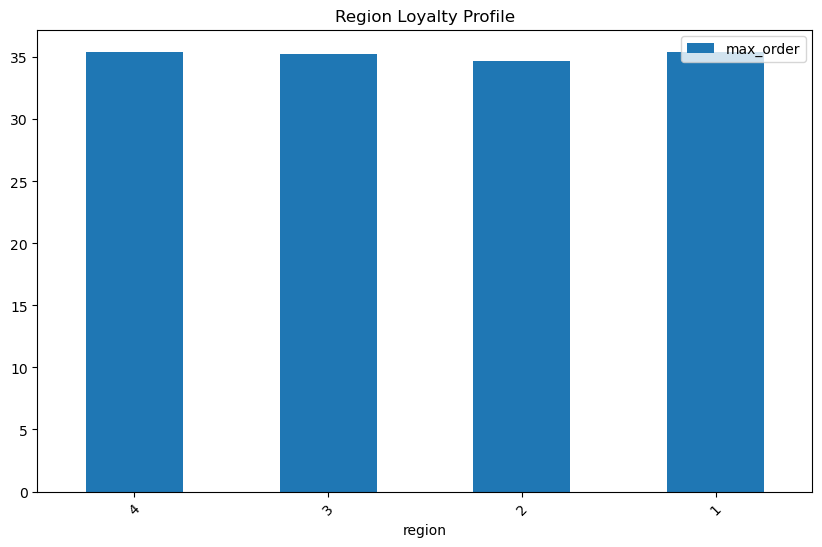

In [27]:
#Creating the column plot 

ords_prods_merge[['region','max_order']].groupby('region').mean().sort_values(by='region', ascending=False).plot.bar(figsize=(10,6), rot=45, title='Region Loyalty Profile')

#Show the plot
plt.show()
 

In [28]:
#Create a path

path_new = r'C:\Users\senoe\OneDrive\SEN Docs\Data Sci Job Applications\CareerFoundry\Datasets'

In [29]:
# Export data to pkl

ords_prods_merge.to_pickle(os.path.join(path_new, 'Sent Client', 'orders_products_merge_comined_2.pkl'))